<a href="https://colab.research.google.com/github/jeansantana100/PI/blob/master/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avaliação AB2.2: Projeto Final 

Aluno: Jean Santana de Souza

Disciplina: Processamento Digital de Imagens

Matrícula: 18111463

Prof. Tácito Neves

# **Descrição do Projeto**

O objetivo principal do trabalho é avaliar de forma prática o entendimento dos
conceitos apresentados. Será apresntado um código que recebe uma imagem de entrada. A saída do
algoritmo será o resultado da aplicação das operações de morfologia: dilatação, erosão, abertura e fechamento.

# **Processamento morfológico de imagens**

É uma área que descreve várias técnicas de
processamento de imagem que lidam com as
características de forma em uma imagem.

Operações morfológica são tipicamente
aplicadas na remoção de imperfeições
introduzidas durante o processo de
segmentação

In [ ]:
### Acessando o Drive
from google.colab import drive

import cv2 as cv
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import numpy as np
from PIL import Image
from itertools import product
from matplotlib import pyplot as plt


drive.mount('/content/drive')
imagem = "/content/drive/MyDrive/Colab Notebooks/imagens/imagem.jpeg"
origAbertura = "/content/drive/MyDrive/Colab Notebooks/imagens/abertura.jpeg"
origFechamento = "/content/drive/MyDrive/Colab Notebooks/imagens/fechamento.jpeg"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imagens usadas para as operações**

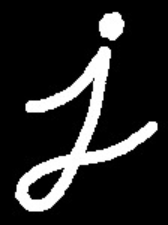

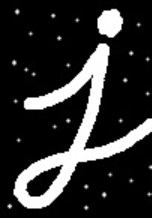

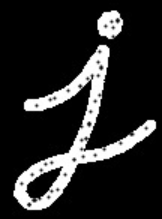

In [ ]:
#plotando as imagens
image = cv.cvtColor(io.imread(imagem), cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image, None, fx=1.5, fy=1.5))
image = cv.cvtColor(io.imread(origAbertura), cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image, None, fx=1.5, fy=1.5))
image = cv.cvtColor(io.imread(origFechamento), cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image, None, fx=1.5, fy=1.5))

In [ ]:
#Abre uma imagem
def abrir_imagem(nome_img):
    img = Image.open(nome_img)
    return img

In [ ]:
class Pixel(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
def converter_para_escala_de_cinza(img):     
    return img.convert('L')

In [ ]:
def binarizar_imagem(img):
    img = converter_para_escala_de_cinza(img)
    pix = img.load()
    
    for i in range(img.width):
        for j in range(img.height):
            if pix[i,j] >= 100:
                pix[i,j] = 255
            else:
                pix[i,j] = 0
    return img

**Dilatação**

In [ ]:
def dilatacao(img):
    pix = img.load()

    pixels_to_paint = []
    
    width, height = img.size
    for j, i in product(range(height-1), range(width-1)):
        if i > 0 and j > 0:
            if pix[i-1,j] == 255 or pix[i+1, j] == 255 or pix[i,j+1] == 255 or pix[i,j-1] == 255:
                pixels_to_paint.append(Pixel(i,j))
    
    for p in pixels_to_paint:
        pix[p.x, p.y] = 255
    
    return img

**Erosão**

In [ ]:
def erosao(img):
    pix = img.load()

    pixels_to_paint = []
    
    width, height = img.size
    for j, i in product(range(height-1), range(width-1)):
        if i > 0 and j > 0:
            if pix[i-1,j] == 255 and pix[i+1, j] == 255 and pix[i,j+1] == 255 and pix[i,j-1] == 255:
                pixels_to_paint.append(Pixel(i,j))
    
    for j, i in product(range(height), range(width)):
        pix[i,j] = 0
    
    for p in pixels_to_paint:
        pix[p.x, p.y] = 255


    return img

**Abertura**

In [ ]:
def abertura(img):
    img = erosao(img)
    img = dilatacao(img)
    return img

**Fechamento**

In [ ]:
def fechamento(img):
    img = dilatacao(img)
    img = erosao(img)
    return img

Text(0.5, 1.0, 'Imagem com Erosão')

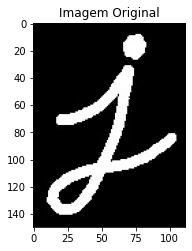

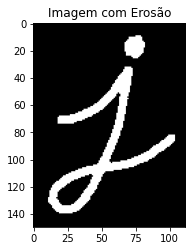

In [ ]:
#Imagem Original
imagemOriginal = abrir_imagem(imagem)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(imagemOriginal, cmap="gray")
plt.title("Imagem Original")

# Imagem com Erosão
fig = plt.figure()
ax2 = abrir_imagem(imagem)
ax2 = binarizar_imagem(ax2)
imagemErosao = erosao(ax2)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(imagemErosao, cmap="gray")
plt.title("Imagem com Erosão")

Text(0.5, 1.0, 'Imagem com Dilatação')

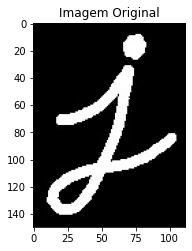

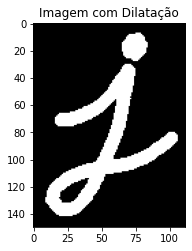

In [ ]:
#Imagem Original
imagemOriginal = abrir_imagem(imagem)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(imagemOriginal, cmap="gray")
plt.title("Imagem Original")

# Imagem com Dilatação
fig = plt.figure()
ax2 = abrir_imagem(imagem)
ax2 = binarizar_imagem(ax2)
imagemDilatacao = dilatacao(ax2)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(imagemDilatacao, cmap="gray")
plt.title("Imagem com Dilatação")

Text(0.5, 1.0, 'Imagem com Abertura')

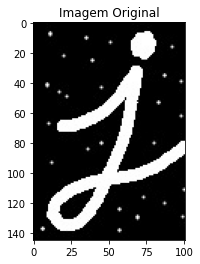

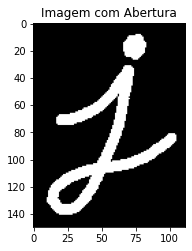

In [ ]:
#Imagem Original
imagemOriginal = abrir_imagem(origAbertura)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(imagemOriginal, cmap="gray")
plt.title("Imagem Original")

# Imagem com Abertura
fig = plt.figure()
ax2 = abrir_imagem(imagem)
ax2 = binarizar_imagem(ax2)
imagemAbertura = abertura(ax2)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(imagemAbertura, cmap="gray")
plt.title("Imagem com Abertura")


Text(0.5, 1.0, 'Imagem com Fechamento')

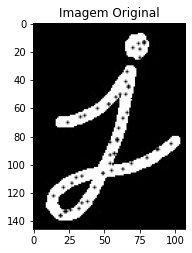

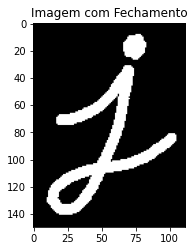

In [ ]:
#Imagem Original
imagemOriginal = abrir_imagem(origFechamento)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(imagemOriginal, cmap="gray")
plt.title("Imagem Original")

# Imagem com Fechamento
fig = plt.figure()
ax2 = abrir_imagem(origFechamento)
ax2 = binarizar_imagem(ax2)
imagemFechamento = fechamento(ax2)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(imagemAbertura, cmap="gray")
plt.title("Imagem com Fechamento")